Pretty gfootball visualization based on: https://www.kaggle.com/jaronmichal/human-readable-visualization/notebook

In [ ]:
# Kaggle environments.
!git clone https://github.com/Kaggle/kaggle-environments.git
!cd kaggle-environments && pip install .

# GFootball environment.
!apt-get update -y
!apt-get install -y libsdl2-gfx-dev libsdl2-ttf-dev

# Make sure that the Branch in git clone and in wget call matches !!
!git clone -b v2.6 https://github.com/google-research/football.git
!mkdir -p football/third_party/gfootball_engine/lib

!wget https://storage.googleapis.com/gfootball/prebuilt_gameplayfootball_v2.6.so -O football/third_party/gfootball_engine/lib/prebuilt_gameplayfootball.so
!cd football && GFOOTBALL_USE_PREBUILT_SO=1 pip3 install .

In [ ]:
import gfootball.env as football_env
env = football_env.create_environment(env_name="11_vs_11_stochastic", # academy_empty_goal_close
                                      rewards='checkpoints,scoring', # space between them is not allowed!
                                      stacked=False, 
                                      logdir='/tmp/football', 
                                      write_goal_dumps=False, 
                                      write_full_episode_dumps=False, 
                                      render=False)

env.reset()
steps = 0
while True:
  obs, rew, done, info = env.step(env.action_space.sample())
  steps += 1
  if steps % 100 == 0:
    print("Step %d Reward: %f" % (steps, rew))
  if done or steps>1000:
    break

print("Steps: %d Reward: %.2f" % (steps, rew))

Step 100 Reward: 0.000000
Step 200 Reward: 0.000000
Step 300 Reward: 0.000000
Step 400 Reward: 0.000000
Step 500 Reward: 0.000000
Step 600 Reward: 0.000000
Step 700 Reward: 0.000000
Step 800 Reward: 0.000000
Step 900 Reward: 0.000000
Step 1000 Reward: 0.000000
Steps: 1001 Reward: 0.00


In [ ]:
env.observation_space.shape

(72, 96, 4)

In [ ]:
import matplotlib.patches as patches
from  matplotlib.patches import Arc
from matplotlib import pyplot as plt

import matplotlib.patches as mpatches
#import matplotlib
#matplotlib.use('Agg')

# Change size of figure
plt.rcParams['figure.figsize'] = [20, 16]
def drawPitch(width, height, color="w"):

  fig = plt.figure()
  ax = plt.axes(xlim=(-10, width + 10), ylim=(-15, height + 5))
  plt.axis('off')

  # Grass around pitch
  rect = patches.Rectangle((-5,-5), width + 10, height + 10, linewidth=1, edgecolor='gray',facecolor='#3f995b', capstyle='round')
  ax.add_patch(rect)

  # Pitch boundaries
  rect = plt.Rectangle((0, 0), width, height, ec=color, fc="None", lw=2)
  ax.add_patch(rect)

  # Middle line
  # plt.plot([width/2, width/2], [0, height], color=color, linewidth=2)
  rect = patches.Rectangle((width/2,0), 0, height, lw=2, ec=color, fc="None")
  ax.add_patch(rect)
  
  # Dots
  dots_x = [11, width/2, width-11]
  for x in dots_x:
    #plt.plot(x, height/2, 'o', color=color, linewidth=2)
    circle = plt.Circle([x, height/2], 0.3, color=color, fc=color, lw=2, alpha=0.5)
    ax.add_artist(circle)

  # Penalty box  
  penalty_box_dim = [16.5, 40.3]
  penalty_box_pos_y = (height - penalty_box_dim[1]) / 2

  rect = plt.Rectangle((0, penalty_box_pos_y), penalty_box_dim[0], penalty_box_dim[1], ec=color, fc="None", lw=2)
  ax.add_patch(rect)
  rect = plt.Rectangle((width, penalty_box_pos_y), -penalty_box_dim[0], penalty_box_dim[1], ec=color, fc="None", lw=2)
  ax.add_patch(rect)

  #Goal box
  goal_box_dim = [5.5, penalty_box_dim[1] - 11 * 2]
  goal_box_pos_y = (penalty_box_pos_y + 11)

  rect = plt.Rectangle((0, goal_box_pos_y), goal_box_dim[0], goal_box_dim[1], ec=color, fc="None", lw=2)
  ax.add_patch(rect)
  rect = plt.Rectangle((width, goal_box_pos_y), -goal_box_dim[0], goal_box_dim[1], ec=color, fc="None", lw=2)
  ax.add_patch(rect)

  #Goals
  rect = plt.Rectangle((0, penalty_box_pos_y + 16.5), -3, 7.5, ec=color, fc=color, lw=2, alpha=0.3)
  ax.add_patch(rect)
  rect = plt.Rectangle((width, penalty_box_pos_y + 16.5), 3, 7.5, ec=color, fc=color, lw=2, alpha=0.3)
  ax.add_patch(rect)
    
  # Middle circle
  mid_circle = plt.Circle([width/2, height/2], 9.15, color=color, fc="None", lw=2)
  ax.add_artist(mid_circle)


  # Penalty box arcs
  left  = patches.Arc([11, height/2], 2*9.15, 2*9.15, color=color, fc="None", lw=2, angle=0, theta1=308, theta2=52)
  ax.add_patch(left)
  right = patches.Arc([width - 11, height/2], 2*9.15, 2*9.15, color=color, fc="None", lw=2, angle=180, theta1=308, theta2=52)
  ax.add_patch(right)

  # Arcs on corners
  corners = [[0, 0], [width, 0], [width, height], [0, height]]
  angle = 0
  for x,y in corners:
    c = patches.Arc([x, y], 2, 2, color=color, fc="None", lw=2, angle=angle,theta1=0, theta2=90)
    ax.add_patch(c)
    angle += 90
  return fig, ax

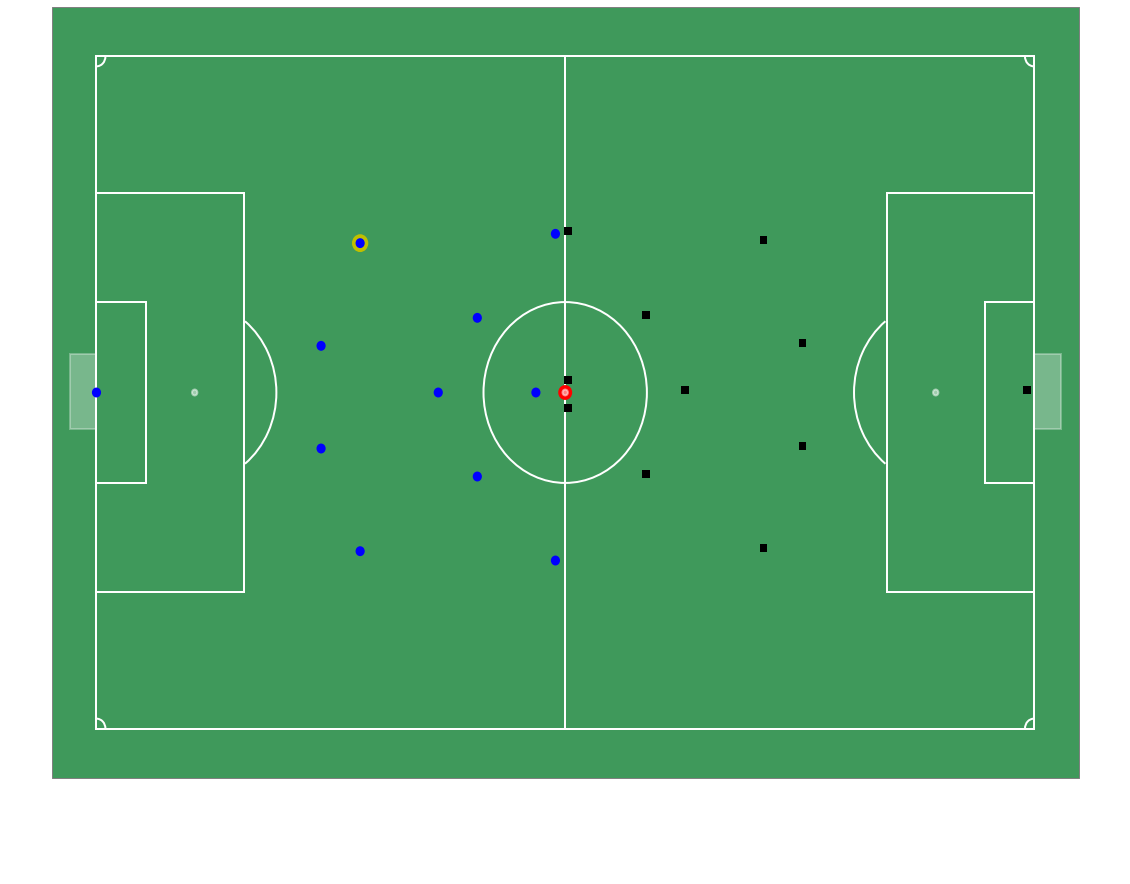

In [ ]:
def drawObservation(observation, WIDTH, HEIGHT, ax):
    ball_pos = None
    active_player = None
    home_players = list()
    away_players = list()

    for y in range(obs.shape[0]):
        for x in range(obs.shape[1]):
            if obs[y][x][0] != 0:
                home_players.append((x,y))
            if obs[y][x][1] != 0:
                away_players.append((x,y))
            if obs[y][x][2] != 0:
                ball_pos = (x,y)
            if obs[y][x][3] != 0:
                active_player = (x,y)
    # print(ball_pos)

    scale_x = WIDTH / obs.shape[1]
    scale_y = HEIGHT / obs.shape[0]
    # Ball
    mid_circle = plt.Circle([ball_pos[0] * scale_x, ball_pos[1]*scale_y], 0.5, color="r", fc="r", lw=5)
    ax.add_patch(mid_circle)
    # Players
    for player in home_players:
        circle = plt.Circle([player[0] * scale_x, player[1]*scale_y], 0.4, color="b", fc="b", lw=2)
        ax.add_artist(circle)
    for player in away_players:
        #circle = plt.Rectangle([player[0] * scale_x, player[1]*scale_y], 0.4, color="black", fc="black", lw=2)
        circle = plt.Rectangle((player[0] * scale_x, player[1]*scale_y), 0.6 , 0.6, ec="black", fc="black", lw=2)
        ax.add_artist(circle)
    # highlight active player
    circle = plt.Circle([active_player[0] * scale_x, active_player[1]*scale_y], 0.8, color="y", fc="y", lw=2)
    ax.add_patch(circle)

def drawAll(obs, output_filename='plot.png'):
    WIDTH = 105
    HEIGHT = 68

    fig, ax = drawPitch(WIDTH, HEIGHT)
    # obs = env.reset()

    drawObservation(obs, WIDTH, HEIGHT, ax)
    plt.savefig(output_filename)


plt.ioff()
obs = env.reset()
drawAll(obs)
plt.show()
plt.close()


### Generating images for every step. Saving to disk is not optimal, we only need the animated series so keeping the images in memory would be better

In [ ]:
env.reset()
step = 0
max_steps=100
while True:
    obs, rew, done, info = env.step(env.action_space.sample())
    step += 1
    drawAll(obs, output_filename= 'pics/' + str(step).zfill(3) + '.png')
    plt.close()

    if done or step>max_steps:
        break

In [ ]:
import glob
from PIL import Image

# filepaths
fp_in = "pics/*.png"
fp_out = "pics/gif.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)


In [ ]:
!rm -rf pics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np



env.reset()
for i in range(10):
  obs, rew, done, info = env.step(env.action_space.sample())
  print(obs.shape)


plt.imshow(obs[:,:,0], cmap='hot', interpolation='nearest')
plt.show()
print(np.matrix(obs[:,:,0]).argmax())
# print(np.matrix(obs[j]))




def init():
    team_left.set_data([], [])
    team_right.set_data([], [])
    ball_owner.set_data([], [])
    team_active.set_data([], [])
    ball.set_data([], [])
    return drawings 

def animate(i):
  global prev_score_a, prev_score_b
  obs = extract_data(output[i])

  # Draw info about ball possesion
  draw_ball_owner(obs, ball_owner, team_active)

  # Draw players
  draw_team(obs, team_left, "left_team")
  draw_team(obs, team_right, "right_team")

  draw_players_directions(obs, directions, "left_team")
  draw_players_directions(obs, directions, "right_team")
    
  draw_ball(obs, ball)

  # Draw textual informations
  text_frame.set_text(f"Frame: {i}/{obs['steps_left'] + i - 1}")
  game_mode.set_text(f"Game mode: {obs['game_mode']}")
  
  score_a, score_b = obs["score"]
  match_info.set_text(f"Left team {score_a} : {score_b} Right Team")

  return drawings  


# May take a while
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=100, blit=True)

HTML(anim.to_html5_video())

In [ ]:
import matplotlib.patches as patches
from  matplotlib.patches import Arc
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.patches as mpatches

# Change size of figure
plt.rcParams['figure.figsize'] = [20, 16]
def drawPitch(width, height, color="w"):

  fig = plt.figure()
  ax = plt.axes(xlim=(-10, width + 10), ylim=(-15, height + 5))
  plt.axis('off')

  # Grass around pitch
  rect = patches.Rectangle((-5,-5), width + 10, height + 10, linewidth=1, edgecolor='gray',facecolor='#3f995b', capstyle='round')
  ax.add_patch(rect)

  # Pitch boundaries
  rect = plt.Rectangle((0, 0), width, height, ec=color, fc="None", lw=2)
  ax.add_patch(rect)

  # Middle line
  plt.plot([width/2, width/2], [0, height], color=color, linewidth=2)
  
  # Dots
  dots_x = [11, width/2, width-11]
  for x in dots_x:
    plt.plot(x, height/2, 'o', color=color, linewidth=2)

  # Penalty box  
  penalty_box_dim = [16.5, 40.3]
  penalty_box_pos_y = (height - penalty_box_dim[1]) / 2

  rect = plt.Rectangle((0, penalty_box_pos_y), penalty_box_dim[0], penalty_box_dim[1], ec=color, fc="None", lw=2)
  ax.add_patch(rect)
  rect = plt.Rectangle((width, penalty_box_pos_y), -penalty_box_dim[0], penalty_box_dim[1], ec=color, fc="None", lw=2)
  ax.add_patch(rect)

  #Goal box
  goal_box_dim = [5.5, penalty_box_dim[1] - 11 * 2]
  goal_box_pos_y = (penalty_box_pos_y + 11)

  rect = plt.Rectangle((0, goal_box_pos_y), goal_box_dim[0], goal_box_dim[1], ec=color, fc="None", lw=2)
  ax.add_patch(rect)
  rect = plt.Rectangle((width, goal_box_pos_y), -goal_box_dim[0], goal_box_dim[1], ec=color, fc="None", lw=2)
  ax.add_patch(rect)

  #Goals
  rect = plt.Rectangle((0, penalty_box_pos_y + 16.5), -3, 7.5, ec=color, fc=color, lw=2, alpha=0.3)
  ax.add_patch(rect)
  rect = plt.Rectangle((width, penalty_box_pos_y + 16.5), 3, 7.5, ec=color, fc=color, lw=2, alpha=0.3)
  ax.add_patch(rect)
    
  # Middle circle
  mid_circle = plt.Circle([width/2, height/2], 9.15, color=color, fc="None", lw=2)
  ax.add_artist(mid_circle)


  # Penalty box arcs
  left  = patches.Arc([11, height/2], 2*9.15, 2*9.15, color=color, fc="None", lw=2, angle=0, theta1=308, theta2=52)
  ax.add_patch(left)
  right = patches.Arc([width - 11, height/2], 2*9.15, 2*9.15, color=color, fc="None", lw=2, angle=180, theta1=308, theta2=52)
  ax.add_patch(right)

  # Arcs on corners
  corners = [[0, 0], [width, 0], [width, height], [0, height]]
  angle = 0
  for x,y in corners:
    c = patches.Arc([x, y], 2, 2, color=color, fc="None", lw=2, angle=angle,theta1=0, theta2=90)
    ax.add_patch(c)
    angle += 90
  return fig, ax

In [ ]:
WIDTH = 105
HEIGHT = 68

drawPitch(WIDTH, HEIGHT)

In [ ]:
from enum import Enum

X_RESIZE = WIDTH
Y_RESIZE = HEIGHT / 0.42

class GameMode(Enum):
    Normal = 0
    KickOff = 1
    GoalKick = 2
    FreeKick = 3
    Corner = 4
    ThrowIn = 5
    Penalty = 6

def scale_x(x):
  return (x + 1) * (X_RESIZE/2)

def scale_y(y):
  return (y + 0.42) * (Y_RESIZE/2)


def extract_data(frame):
  res = {}
  obs = frame[0]['observation']['players_raw'][0]
  res["left_team"] = [(scale_x(x), scale_y(y)) for x, y in obs["left_team"]]
  res["right_team"] = [(scale_x(x), scale_y(y)) for x, y in obs["right_team"]]

  ball_x, ball_y, ball_z = obs["ball"]
  res["ball"] = [scale_x(ball_x),  scale_y(ball_y), ball_z]
  res["score"] = obs["score"]
  res["steps_left"] = obs["steps_left"]
  res["ball_owned_team"] = obs["ball_owned_team"]
  res["ball_owned_player"] = obs["ball_owned_player"]
  res["right_team_roles"] = obs["right_team_roles"]
  res["left_team_roles"] = obs["left_team_roles"]
  res["left_team_direction"] = obs["left_team_direction"]
  res["right_team_direction"] = obs["right_team_direction"]
  res["game_mode"] = GameMode(obs["game_mode"]).name
  return res

In [ ]:
import math


def draw_team(obs, team, side):
  X = []
  Y = []
  for x, y in obs[side]:
    X.append(x)
    Y.append(y)
  team.set_data(X, Y)

def draw_ball(obs, ball):
  ball.set_markersize(10 + 5 * obs["ball"][2]) # Scale size of ball based on height
  ball.set_data(obs["ball"][:2])

def draw_ball_owner(obs, ball_owner, team_active):
  if obs["ball_owned_team"] == 0:
    x, y = obs["left_team"][obs["ball_owned_player"]]
    ball_owner.set_data(x, y)
    team_active.set_data(WIDTH / 4 + 7, -7)
    team_active.set_markerfacecolor("red")
  elif obs["ball_owned_team"] == 1:
    x, y = obs["right_team"][obs["ball_owned_player"]]
    ball_owner.set_data(x, y)
    team_active.set_data(WIDTH / 4 + 50, -7)
    team_active.set_markerfacecolor("blue")
  else:
    ball_owner.set_data([], [])
    team_active.set_data([], [])
    
def draw_players_directions(obs, directions, side):
  index = 0
  if "right" in side:
    index = 11
  for i, player_dir in enumerate(obs[f"{side}_direction"]):
    x_dir, y_dir = player_dir
    dist = math.sqrt(x_dir ** 2 + y_dir ** 2) + 0.00001 # to prevent division by 0
    x = obs[side][i][0]
    y = obs[side][i][1] 
    directions[i + index].set_data([x, x + x_dir / dist ], [y, y + y_dir / dist])

In [ ]:
import numpy as np
from IPython.display import HTML

fig, ax = drawPitch(WIDTH, HEIGHT)
ax.invert_yaxis()

ball_owner, = ax.plot([], [], 'o', markersize=30,  markerfacecolor="yellow", alpha=0.5)
team_active, = ax.plot([], [], 'o', markersize=30,  markerfacecolor="blue", markeredgecolor="None")

team_left, = ax.plot([], [], 'o', markersize=20, markerfacecolor="r", markeredgewidth=2, markeredgecolor="white")
team_right, = ax.plot([], [], 'o', markersize=20,  markerfacecolor="b", markeredgewidth=2, markeredgecolor="white")

ball, = ax.plot([], [], 'o', markersize=10,  markerfacecolor="black", markeredgewidth=2, markeredgecolor="white")
text_frame = ax.text(-5, -5, '', fontsize=25)
match_info = ax.text(105 / 4 + 10, -5, '', fontsize=25)
game_mode = ax.text(105 - 25, -5, '', fontsize=25)
goal_notification = ax.text(105 / 4 + 10, 0, '', fontsize=25)

# Drawing of directions definitely can be done in a better way
directions = []
for i in range(22):
  direction, = ax.plot([], [], color='yellow', lw=3)
  directions.append(direction)

  
drawings = [team_active, ball_owner, team_left, team_right, ball, text_frame, match_info, game_mode, goal_notification]

def init():
    team_left.set_data([], [])
    team_right.set_data([], [])
    ball_owner.set_data([], [])
    team_active.set_data([], [])
    ball.set_data([], [])
    return drawings 

"running_in_notebook": True, "episodeSteps": 1000}, debug=True)
output = env.run([agent, agent])